#Redes neuronales simples: Anemia

##Lectura de datos y generación de dataset

In [ ]:
#Importar la biblioteca pandas
import pandas as pd

#Especificar la ruta del archivo CSV
file_path = './data/data_ane.csv'

#Leer el archivo CSV y crear el dataframe
df = pd.read_csv(file_path, sep=',')

#Mostrar las primeras filas del dataframe para verificar que se haya leído correctamente
df.head()


,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M,TARGET
0,48.2,14.9,5.17,93.1,28.9,31.0,0
1,49.8,16.2,5.42,91.9,30.0,32.6,0
2,46.3,14.7,4.63,100.0,31.8,31.7,1
3,49.0,15.8,5.36,91.4,29.4,32.2,0
4,43.9,14.0,4.79,91.7,29.2,31.8,0


##Importación de librerías

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

##Normalización de los datos

In [ ]:
X = df.drop(columns='TARGET')

In [ ]:
y= df['TARGET']

In [ ]:
X.head()

,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M
0,48.2,14.9,5.17,93.1,28.9,31.0
1,49.8,16.2,5.42,91.9,30.0,32.6
2,46.3,14.7,4.63,100.0,31.8,31.7
3,49.0,15.8,5.36,91.4,29.4,32.2
4,43.9,14.0,4.79,91.7,29.2,31.8


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TARGET, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Implementación del modelo

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=10, random_state=42)

In [ ]:
clf.fit(X_train_scaled, y_train)  # Train the classifier


Iteration 1, loss = 0.62636956
Iteration 2, loss = 0.55203343
Iteration 3, loss = 0.50496964
Iteration 4, loss = 0.47424168
Iteration 5, loss = 0.45412800
Iteration 6, loss = 0.44018147
Iteration 7, loss = 0.43154872
Iteration 8, loss = 0.42317711
Iteration 9, loss = 0.41777557
Iteration 10, loss = 0.41133217
Iteration 11, loss = 0.40836309
Iteration 12, loss = 0.40519251
Iteration 13, loss = 0.40139024
Iteration 14, loss = 0.39844683
Iteration 15, loss = 0.39752915
Iteration 16, loss = 0.39359810
Iteration 17, loss = 0.39144307
Iteration 18, loss = 0.38899414
Iteration 19, loss = 0.38772584
Iteration 20, loss = 0.38534917
Iteration 21, loss = 0.38377397
Iteration 22, loss = 0.38279125
Iteration 23, loss = 0.38108950
Iteration 24, loss = 0.37931769
Iteration 25, loss = 0.37875043
Iteration 26, loss = 0.37868744
Iteration 27, loss = 0.37628024
Iteration 28, loss = 0.37600558
Iteration 29, loss = 0.37547752
Iteration 30, loss = 0.37342609
Iteration 31, loss = 0.37220162
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=500, random_state=42,
              verbose=10)

In [ ]:
# Predecir en los datos de entrenamiento
y_train_pred = clf.predict(X_train_scaled)

# Predecir en los datos de prueba
y_test_pred = clf.predict(X_test_scaled)

##Métricas de evaluación

In [ ]:
y_pred = clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.8506271379703535
Precision: 0.8116129032258065
Recall (Sensitivity): 0.8442953020134228
F1-Score: 0.8276315789473684


In [ ]:
import numpy as np
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", np.mean(scores))

Iteration 1, loss = 2.26260031
Iteration 2, loss = 0.78361183
Iteration 3, loss = 0.67293058
Iteration 4, loss = 0.65048322
Iteration 5, loss = 0.63569929
Iteration 6, loss = 0.63413562
Iteration 7, loss = 0.63013185
Iteration 8, loss = 0.62992381
Iteration 9, loss = 0.63118498
Iteration 10, loss = 0.64364586
Iteration 11, loss = 0.63012624
Iteration 12, loss = 0.62812180
Iteration 13, loss = 0.63847281
Iteration 14, loss = 0.62861150
Iteration 15, loss = 0.61722135
Iteration 16, loss = 0.64895841
Iteration 17, loss = 0.63494782
Iteration 18, loss = 0.63600017
Iteration 19, loss = 0.61346914
Iteration 20, loss = 0.61072981
Iteration 21, loss = 0.61553996
Iteration 22, loss = 0.60490106
Iteration 23, loss = 0.60266525
Iteration 24, loss = 0.59824290
Iteration 25, loss = 0.59004999
Iteration 26, loss = 0.58707829
Iteration 27, loss = 0.58590031
Iteration 28, loss = 0.58428478
Iteration 29, loss = 0.58746790
Iteration 30, loss = 0.60173461
Iteration 31, loss = 0.60031404
Iteration 32, los

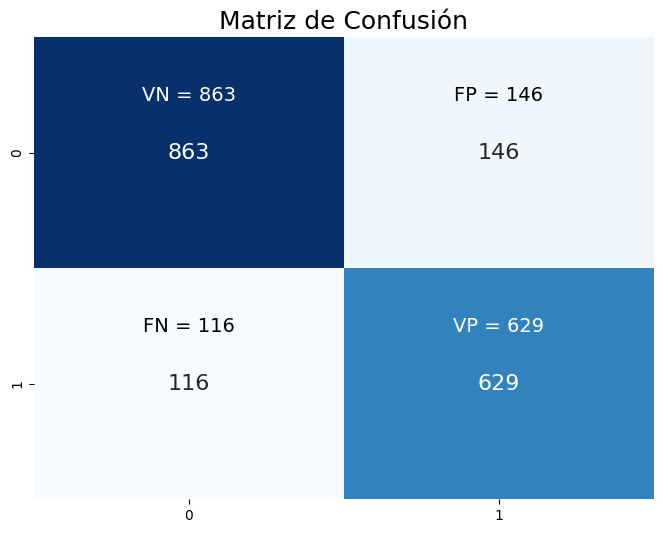

Verdaderos Negativos (TN): 863
Falsos Positivos (FP): 146
Falsos Negativos (FN): 116
Verdaderos Positivos (TP): 629


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = cm.ravel()

# Visualizar la matriz de confusión con anotaciones
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Añadir etiquetas para mayor claridad
plt.title('Matriz de Confusión', fontsize=18)
plt.text(0.5, 0.25, f'VN = {TN}', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.25, f'FP = {FP}', ha='center', va='center', color='black', fontsize=14)
plt.text(0.5, 1.25, f'FN = {FN}', ha='center', va='center', color='black', fontsize=14)
plt.text(1.5, 1.25, f'VP = {TP}', ha='center', va='center', color='white', fontsize=14)

plt.show()

# Imprimir los valores de la matriz de confusión
print(f"Verdaderos Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdaderos Positivos (TP): {TP}")


##Gráfico de pasteles

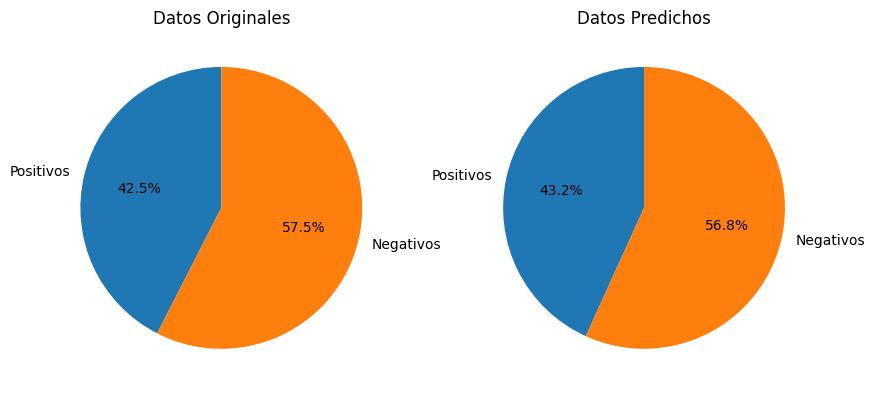

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos originales y predicciones en dos arrays o listas
# Aquí hay datos de ejemplo
datos_originales = np.array(y_test)
datos_predichos = np.array(y_test_pred)

# Contar la cantidad de valores positivos y negativos en ambas variables
originales_positivos = np.sum(datos_originales == 1)
originales_negativos = np.sum(datos_originales == 0)
predichos_positivos = np.sum(datos_predichos == 1)
predichos_negativos = np.sum(datos_predichos == 0)

# Etiquetas para las leyendas
etiquetas = ['Positivos', 'Negativos']

# Datos para los gráficos de pasteles
datos_originales = [originales_positivos, originales_negativos]
datos_predichos = [predichos_positivos, predichos_negativos]

# Configuración de la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de pasteles para los datos originales
axs[0].pie(datos_originales, labels=etiquetas, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Datos Originales')

# Gráfico de pasteles para los datos predichos
axs[1].pie(datos_predichos, labels=etiquetas, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Datos Predichos')

plt.show()


##Gráfico de densidad

/tmp/ipykernel_21739/2982790618.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, shade=True, label='Reales')
/home/roof/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_21739/2982790618.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_pred, shade=True, label='Predictivos')
/home/roof/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

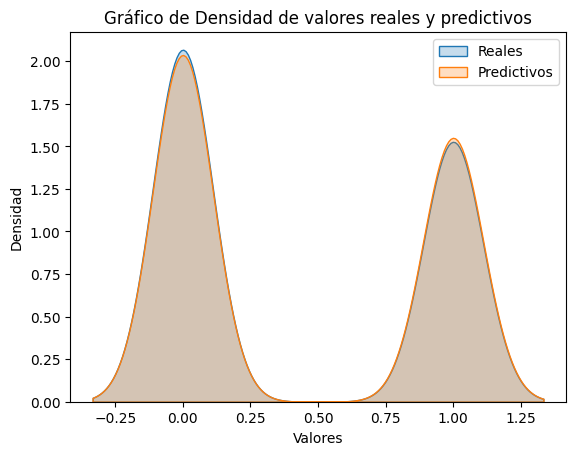

In [ ]:
# Asumiendo que 'y_test' y 'y_test_pred' son arrays NumPy
feature1 = np.array(y_test)
feature2 = np.array(y_test_pred)
# Gráfico de Densidad (KDE Plot)}
sns.kdeplot(y_test, shade=True, label='Reales')
sns.kdeplot(y_test_pred, shade=True, label='Predictivos')
plt.title('Gráfico de Densidad de valores reales y predictivos')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()